# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [1]:
import pandas as pd

In [5]:
samplns_data = pd.read_json("./05_clean_data.json.zip")
baseline_data = pd.read_json("./00_simple_baseline_data.json.zip")
from _conf import EXTENDED_BASELINE_DATA
extended_baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)
extended_baseline_data = pd.concat([baseline_data, extended_baseline_data])
baseline_data

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,runtime,sample_size,path_to_baseline_sample
0,calculate,9,15,FIDE-ICPL,t2,1.484,9.0,2023-03-01_13-51-03/1_1_0_1_sample.csv
1,calculate,9,15,FIDE-ICPL,t2,1.280,9.0,2023-03-01_13-51-03/1_1_0_2_sample.csv
2,calculate,9,15,FIDE-ICPL,t2,1.289,9.0,2023-03-01_13-51-03/1_1_0_3_sample.csv
3,calculate,9,15,FIDE-ICPL,t2,1.274,9.0,2023-03-01_13-51-03/1_1_0_4_sample.csv
4,calculate,9,15,FIDE-ICPL,t2,1.277,9.0,2023-03-01_13-51-03/1_1_0_5_sample.csv
...,...,...,...,...,...,...,...,...
2745,freetz,31012,102705,YASA,t2_m10_null,900.008,NaN,None
2746,freetz,31012,102705,YASA,t2_m10_null,900.008,NaN,None
2747,freetz,31012,102705,YASA,t2_m10_null,900.010,NaN,None
2748,freetz,31012,102705,YASA,t2_m10_null,900.009,NaN,None


In [6]:
pd.read_json(EXTENDED_BASELINE_DATA)

,instance_name,num_vars,num_clauses,baseline_alg,baseline_alg_conf,Time,sample_size,path_to_baseline_sample,best_lower_bound,gap
0,APL,23.0,35.0,ACTS-IPOG-FT,t2,550.0,11.0,results/2023-07-16_22-29-39/9_1_0_1_sample.csv,7,36.363636
1,APL,23.0,35.0,ACTS-IPOG-CSP,t2,1220.0,11.0,results/2023-07-16_22-29-39/9_1_1_1_sample.csv,7,36.363636
2,APL,23.0,35.0,ACTS-IPOF-FT,t2,585.0,10.0,results/2023-07-16_22-29-39/9_1_2_1_sample.csv,7,30.000000
3,APL,23.0,35.0,ACTS-IPOF-CSP,t2,1191.0,10.0,results/2023-07-16_22-29-39/9_1_3_1_sample.csv,7,30.000000
4,APL-Model,28.0,40.0,ACTS-IPOG-FT,t2,619.0,15.0,results/2023-07-16_22-29-39/11_1_0_1_sample.csv,7,53.333333
...,...,...,...,...,...,...,...,...,...,...
137,soletta_2015-06-26_18-38-56,NaN,NaN,None,None,NaN,NaN,None,24,NaN
138,toybox_2006-10-31_23-30-06,NaN,NaN,None,None,NaN,NaN,None,8,NaN
139,toybox_2020-12-06_00-02-46,NaN,NaN,None,None,NaN,NaN,None,7,NaN
140,uclibc_2008-06-05_13-46-47,NaN,NaN,None,None,NaN,NaN,None,505,NaN


In [37]:
best_lower_bound = samplns_data.groupby(["instance_name"])["lower_bound"].max().reset_index().rename(columns={"lower_bound": "best_lower_bound"})
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound


,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1841
8,FameDB,8
9,FeatureIDE,7


In [38]:
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS
external_best_lb = pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS]).groupby(["instance_name"])["best_lower_bound"].max().reset_index()
best_lower_bound = pd.concat([best_lower_bound, external_best_lb]).groupby(["instance_name"])[["best_lower_bound", "internal_best"]].max().reset_index()
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,28,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,8.0
7,EMBToolkit,1872,1841.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [39]:
samplns_data = samplns_data[["instance_name", "upper_bound"]]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
samplns_data["gap"] =100*( 1- (samplns_data["best_lower_bound"]/ samplns_data["upper_bound"]))
samplns_data["algorithm_name"] = "SampLNS"
samplns_data

,instance_name,upper_bound,best_lower_bound,internal_best,gap,algorithm_name
0,integrator_arm7,47,32,32.0,31.914894,SampLNS
1,integrator_arm7,47,32,32.0,31.914894,SampLNS
2,integrator_arm7,44,32,32.0,27.272727,SampLNS
3,integrator_arm7,46,32,32.0,30.434783,SampLNS
4,integrator_arm7,43,32,32.0,25.581395,SampLNS
...,...,...,...,...,...,...
225,FreeBSD-8_0_0,64,30,30.0,53.125000,SampLNS
226,FreeBSD-8_0_0,68,30,30.0,55.882353,SampLNS
227,FreeBSD-8_0_0,63,30,30.0,52.380952,SampLNS
228,FreeBSD-8_0_0,63,30,30.0,52.380952,SampLNS


In [40]:
baseline_data = baseline_data[["instance_name", "sample_size", "baseline_alg", "baseline_alg_conf"]]
baseline_data = baseline_data.merge(best_lower_bound, on="instance_name")
baseline_data["gap"] = 100*(1-(baseline_data["best_lower_bound"]/baseline_data["sample_size"]))
def baseline_alg_name(row):
    settings = row["baseline_alg_conf"]
    if "_m" in settings:
        m = settings.split("_m")[-1].split("_")[0]
        return f"{row['baseline_alg']}(m={m})"
    return row["baseline_alg"]
baseline_data["algorithm_name"] = baseline_data.apply(baseline_alg_name, axis=1)
#baseline_data.rename(columns={"baseline_alg": "Algorithm"})
baseline_data

,instance_name,sample_size,baseline_alg,baseline_alg_conf,best_lower_bound,internal_best,gap,algorithm_name
0,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
1,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
2,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
3,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
4,calculate,9.0,FIDE-ICPL,t2,5,5.0,44.444444,FIDE-ICPL
...,...,...,...,...,...,...,...,...
2525,ea2468,65.0,YASA,t2_m10_null,32,31.0,50.769231,YASA(m=10)
2526,ea2468,65.0,YASA,t2_m10_null,32,31.0,50.769231,YASA(m=10)
2527,ea2468,65.0,YASA,t2_m10_null,32,31.0,50.769231,YASA(m=10)
2528,ea2468,65.0,YASA,t2_m10_null,32,31.0,50.769231,YASA(m=10)


In [41]:
gaps = pd.concat([samplns_data[["algorithm_name", "gap"]], baseline_data[['algorithm_name', 'gap']]])
gaps

,algorithm_name,gap
0,SampLNS,31.914894
1,SampLNS,31.914894
2,SampLNS,27.272727
3,SampLNS,30.434783
4,SampLNS,25.581395
...,...,...
2525,YASA(m=10),50.769231
2526,YASA(m=10),50.769231
2527,YASA(m=10),50.769231
2528,YASA(m=10),50.769231


In [42]:
gaps["solved"] = 0.0
gaps.loc[~gaps["gap"].isna(), "solved"]=1
gaps.groupby(["algorithm_name"]).mean()

,gap,solved
algorithm_name,,
FIDE-Chvatal,40.128888,0.786957
FIDE-ICPL,40.232894,0.978261
FIDE-YASA(m=1),35.670807,1.000000
FIDE-YASA(m=10),29.152132,1.000000
FIDE-YASA(m=3),30.941788,1.000000
FIDE-YASA(m=5),30.174370,1.000000
Incling,48.046350,0.978261
SampLNS,9.811318,1.000000
YASA(m=1),33.996527,1.000000


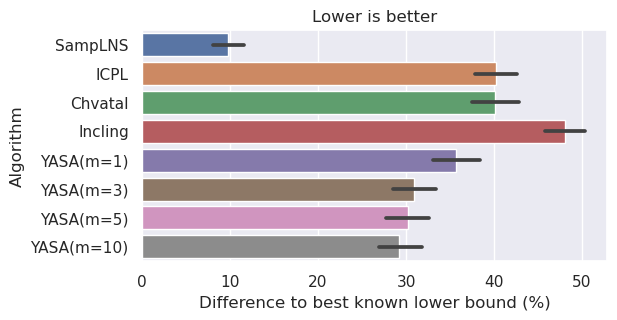

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

t = gaps[~gaps["algorithm_name"].str.startswith("YASA")].copy()
f, ax = plt.subplots(figsize=(6, 3))
t["algorithm_name"] = t["algorithm_name"].str.replace("FIDE-", "")
plt.title("Lower is better")
sns.barplot(data=t, y="algorithm_name", x="gap")
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Algorithm")
plt.show()